# Load data

In [25]:
from dotenv import load_dotenv
import os
from elasticsearch import Elasticsearch

# take environment variables from .env.
load_dotenv()

PROJECT_INDEX = os.getenv("PROJECT_INDEX")

### retrieve data from Elastisearch

In [26]:
import retrieve_data

In [27]:
data = retrieve_data.run_project()

C:\Users\aless\Desktop\testEmbeddingModels\retrieve_data.py:53: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  search_results = dev_client.search(index=PROJECT_INDEX, query=query, scroll="30s", size=10000)['hits']['hits']


In [28]:
from utilis import get_bio_by_profile_id, rebuild_bio

In [29]:
get_bio_by_profile_id(data, 2)

'A Criminological Study of Businesses in Rome. Our study aims to provide a statistical construction of a feasible range of organised crime outcomes across Italian provinces by avoiding the arbitrariness of indicator and variable choices. In Italy, indeed, organized crime is a long-lasting phenomenon, and criminal organizations have a pervasive control over the territory allowing criminal groups to engage in complex criminal activities (e.g., smuggling and drug-trafficking) as well as threatening local politicians and public officials. Launch a survey of businesses in Rome, analyze results, run workshops on the topic with subject experts and citizens around Italy, go online with website.'

In [30]:
get_bio_by_profile_id(data, 23)

'(Bonn) A Criminological Study of Businesses in Rome. Our study aims to provide a statistical construction of a feasible range of organised crime outcomes across Italian provinces by avoiding the arbitrariness of indicator and variable choices. In Italy, indeed, organized crime is a long-lasting phenomenon, and criminal organizations have a pervasive control over the territory allowing criminal groups to engage in complex criminal activities (e.g., smuggling and drug-trafficking) as well as threatening local politicians and public officials. Launch a survey of businesses in Rome, analyze results, run workshops on the topic with subject experts and citizens around Italy, go online with website.'

# Semantic search

## variables

In [31]:
profile_id = 2
model = "all-MiniLM-L6-v2"
top_k = 5

## semantic search

In [32]:
from semantic_sentence import semantic_search, m_sentences, semantic_text_similarity, best_rank_sentence

all_scores_semantic_search, result_semantic_search = semantic_search(data, profile_id, top_k=top_k, model=model)





Query: A Criminological Study of Businesses in Rome.

Top 5 most similar sentences in corpus:
sentence with profile_id 3
A Criminological Study on Businesses in Rome. (Score: 0.9964)
sentence with profile_id 23
(Bonn) A Criminological Study of Businesses in Rome. (Score: 0.9327)
sentence with profile_id 23
Launch a survey of businesses in Rome, analyze results, run workshops on the topic with subject experts and citizens around Italy, go online with website. (Score: 0.5755)
sentence with profile_id 23
In Italy, indeed, organized crime is a long-lasting phenomenon, and criminal organizations have a pervasive control over the territory allowing criminal groups to engage in complex criminal activities (e.g., smuggling and drug-trafficking) as well as threatening local politicians and public officials. (Score: 0.4299)
sentence with profile_id 31
Raise awareness about the 1996 italian law about social reuses. (Score: 0.3498)




Query: Our study aims to provide a statistical constructio

In [33]:
# dict(sorted(result_semantic_search.items(), key=lambda item: item[1], reverse=True))

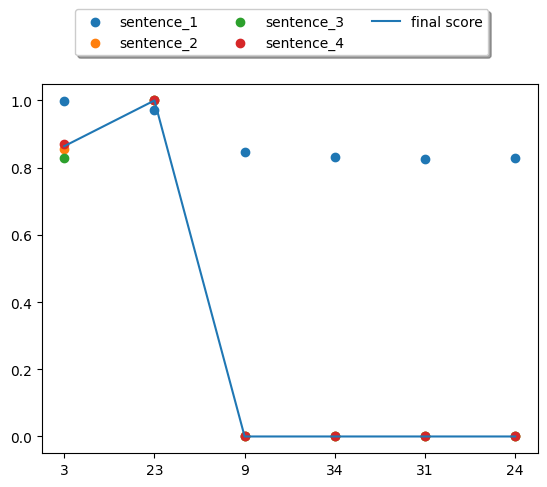

In [29]:
import matplotlib.pyplot as plt
import numpy as np

length = len(list(all_scores_semantic_search.values())[0])
profile_ids = [str(i) for i in all_scores_semantic_search.keys()]
sentences = [f"sentence_{i + 1}" for i in range(length)]

fig = plt.figure()
for i in range(length):
    values = list()
    for element in all_scores_semantic_search.values():
        values.append(element[i])
    plt.scatter(profile_ids, values, marker='o', label=sentences[i])
    
plt.plot(profile_ids, result_semantic_search.values(), label='final score')  


fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## mean between vectors

In [11]:
result_mean = m_sentences(data, profile_id, type_operation='mean', model=model)

In [12]:
# for key, value in dict(sorted(result_mean.items(), key=lambda item: item[1], reverse=True)).items():
#     print(f"profile id: {key}\n")
#     print(f"score: {value}\n")
#     print("======================\n")

## median between vectors

In [13]:
result_median = m_sentences(data, profile_id, type_operation='median', model=model)

In [14]:
# for key, value in dict(sorted(result_median.items(), key=lambda item: item[1], reverse=True)).items():
#     print(f"profile id: {key}\n")
#     print(f"score: {value}\n")
#     print("======================\n")

## semantic search similarity

In [15]:
all_scores_semantic_text_similarity, result_semantic_text_similarity = semantic_text_similarity(data, profile_id, model=model)

In [16]:
# for key, value in dict(sorted(result_semantic_text_similarity.items(), key=lambda item: item[1], reverse=True)).items():
#     print(f"profile id: {key}\n")
#     print(f"score: {value}\n")
#     print("======================\n")

In [17]:
# for i in all_scores_semantic_text_similarity[53]:
#     for l in i:
#         print(round(l.item(), 4), end=" ")
#     print("\n")

In [18]:
# import matplotlib.pyplot as plt
# import numpy as np

# fig = plt.figure()

# cax = plt.matshow(all_scores_semantic_text_similarity[16], fignum=0, aspect='auto', interpolation='nearest')
# fig.colorbar(cax)
# plt.show()

## best rank sentence

In [19]:
result_best_rank_sentence = best_rank_sentence(data, profile_id, min_score=0.1)

## all results

In [20]:
all_results = {
    "best_rank_sentence": dict(sorted(result_best_rank_sentence.items(), key=lambda item: item[1], reverse=True)),
    "result_mean": dict(sorted(result_mean.items(), key=lambda item: item[1], reverse=True)),
    "result_median": dict(sorted(result_median.items(), key=lambda item: item[1], reverse=True)),
    "result_semantic_text_similarity": dict(sorted(result_semantic_text_similarity.items(), key=lambda item: item[1], reverse=True)),
    "result_semantic_search": dict(sorted(result_semantic_search.items(), key=lambda item: item[1], reverse=True))
}

In [21]:
for key, result in all_results.items():
    print(key)
    print("======================\n")
    for single_profile, score in result.items():
        print(f"profile id: {single_profile}", end=" ")
        print(f"score: {score}")
    print("\n\n")

best_rank_sentence

profile id: 23 score: 1.0
profile id: 3 score: 0.996



result_mean

profile id: 23 score: 0.9927432537078857
profile id: 3 score: 0.7644822597503662
profile id: 31 score: 0.5191020369529724
profile id: 34 score: 0.47987067699432373
profile id: 29 score: 0.3419744372367859



result_median

profile id: 23 score: 0.9866845607757568
profile id: 3 score: 0.7401694059371948
profile id: 31 score: 0.46182459592819214
profile id: 34 score: 0.4616992473602295
profile id: 29 score: 0.3161816895008087



result_semantic_text_similarity

profile id: 3 score: 0.5824510455131531
profile id: 23 score: 0.5753023028373718
profile id: 31 score: 0.26489758491516113
profile id: 34 score: 0.2567320168018341
profile id: 40 score: 0.2153293788433075
profile id: 13 score: 0.21377231180667877
profile id: 29 score: 0.2052510529756546
profile id: 15 score: 0.1966366469860077
profile id: 27 score: 0.17467591166496277
profile id: 10 score: 0.16580775380134583
profile id: 26 score: 0.1599882245

In [22]:
all_scores_semantic_search

{3: [0.9964317083358765, 0.4234547019004822, 0.5734431147575378, 0],
 23: [0.9327012896537781, 1.0000001192092896, 1.0, 1.0],
 31: [0.3498167395591736, 0.44142118096351624, 0.5670417547225952, 0],
 34: [0.3722109794616699, 0, 0, 0],
 9: [0.43005049228668213, 0, 0, 0]}

In [24]:
all_scores_semantic_text_similarity

{1: tensor([[0.0926, 0.1477],
         [0.0531, 0.0607],
         [0.0413, 0.0371],
         [0.2037, 0.0069]]),
 3: tensor([[0.9964],
         [0.3365],
         [0.4235],
         [0.5734]]),
 4: tensor([[ 0.0570,  0.1245],
         [ 0.1191,  0.1317],
         [-0.0068,  0.1302],
         [ 0.2389,  0.0646]]),
 9: tensor([[ 0.2846,  0.0897,  0.0897,  0.0897,  0.0662,  0.0897,  0.0662,  0.0662,
           0.0949,  0.1330],
         [ 0.2147,  0.0185,  0.0185,  0.0185,  0.0206,  0.0185,  0.0206,  0.0206,
           0.0273,  0.0293],
         [ 0.2463, -0.0239, -0.0239, -0.0239, -0.0212, -0.0239, -0.0212, -0.0212,
          -0.0019, -0.0079],
         [ 0.4301, -0.0325, -0.0325, -0.0325, -0.0320, -0.0325, -0.0320, -0.0320,
          -0.0443,  0.0086]]),
 10: tensor([[0.2271],
         [0.0976],
         [0.1852],
         [0.1534]]),
 11: tensor([[0.2340, 0.1618, 0.0500, 0.0680, 0.1391],
         [0.1015, 0.1340, 0.0210, 0.0648, 0.1053],
         [0.1599, 0.1475, 0.0419, 0.0744, 0.1161